#### Import necessary packages


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset into DataFrame

In [2]:
df = pd.read_csv("mlbootcamp5_train.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Print the size

In [3]:
df.shape

(70000, 13)

## Count Values

### How many people smoke?

In [4]:
df.smoke.value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

### How many people consume alcohol?


In [5]:
df.alco.value_counts()

0    66236
1     3764
Name: alco, dtype: int64

### What are the difference glucose levels?


In [6]:
df.gluc.value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

### Draw bar chart for smoke column


<AxesSubplot:xlabel='smoke', ylabel='count'>

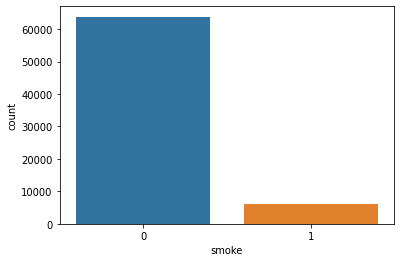

In [7]:
sns.countplot(x='smoke',data=df)

### Draw 4 count plots for gender, smoke, alco and active columns respectively in 1 row, 4 columns

In [8]:
binary_df = df[['gender','smoke','alco','active']]

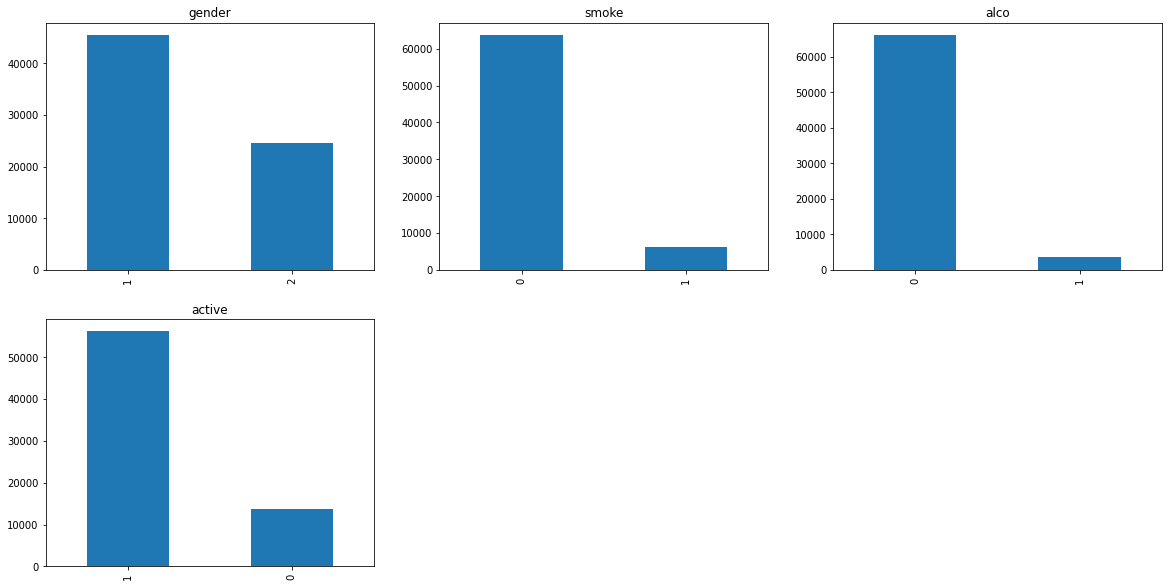

In [9]:
plt.subplot(231)
binary_df['gender'].value_counts().plot(kind='bar',title='gender',figsize = (20,10))

plt.subplot(232)
binary_df['smoke'].value_counts().plot(kind='bar',title='smoke')

plt.subplot(233)
binary_df['alco'].value_counts().plot(kind='bar',title='alco')

plt.subplot(234)
binary_df['active'].value_counts().plot(kind='bar',title='active')

plt.show()

### Draw a count plot for cholesterol and gluc columns


<AxesSubplot:xlabel='variable', ylabel='count'>

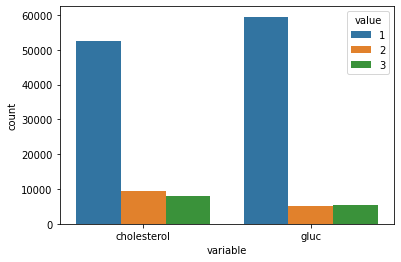

In [10]:
sns.countplot(x="variable", hue='value', data = pd.melt(df[['cholesterol','gluc']]))

## Plot Data Distribution

### Show the distribution of age values as histogram


<AxesSubplot:xlabel='age', ylabel='Density'>

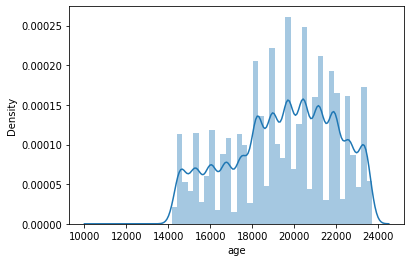

In [11]:
sns.distplot(df.age)

### Show the distribution of age, height and weight values as 3 histograms in one plot

<AxesSubplot:xlabel='weight', ylabel='Density'>

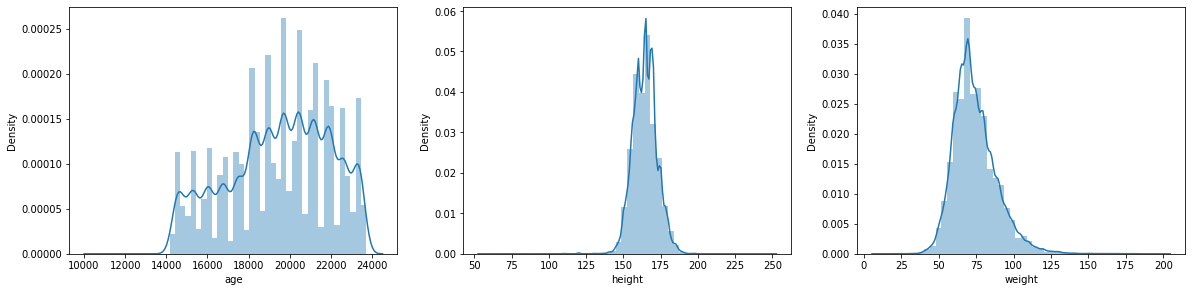

In [12]:
plt.figure(figsize = (20,10))

plt.subplot(231)
sns.distplot(df.age)

plt.subplot(232)
sns.distplot(df.height)

plt.subplot(233)
sns.distplot(df.weight)

## Calculate Summary Statistics Using Pandas

### 1. How many men and women are present in this dataset?

In [13]:
df.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [14]:
temp = df.groupby('gender')

In [15]:
temp['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

### 2. Which gender more often reports consuming alcohol - men or women?

In [16]:
temp['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

### 3. Which gender is more physically active - men or women?

In [17]:
temp['active'].mean()

gender
1    0.802021
2    0.806906
Name: active, dtype: float64

### 4. What is the the rounded difference between the percentages of smokers among men and women(rounded)?

In [18]:
temp['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

#### So, men smokes more tha women. Now, let us find out what percentage men smokes more than women

In [19]:
round((df[df['smoke']==0]['age'].median() - df[df['smoke']==1]['age'].median())/30)

20

### 5. What is the difference between median values of age for smokers and non-smokers (in months, rounded)? You'll need to figure out the units of feature age in this dataset


In [20]:
df['yearly'] = df['age'].apply(lambda x : x/365)
temp1 = df.groupby('smoke')
temp1['yearly'].median()

smoke
0    54.032877
1    52.397260
Name: yearly, dtype: float64

#### Median age of smokers is 52.4 years, for non-smokers it's 54. We see that the correct answer is 20 months. Now, subtract the median age to find out the difference.


In [21]:
(df[df['smoke']==0]['yearly'].median() - df[df['smoke']==1]['yearly'].median())*12

19.62739726027391

In [22]:
df = df.drop(['yearly'],axis=1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Perform Risk Analysis

### Calculate a new feature, age_years

In [23]:
df['age_years'] =df['age'].apply(lambda x:int(x/365))

### Check age_years column using head()

In [24]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


### What is maximum age_years?

In [25]:
df.age_years.max()

64

### What is minimum age_years?


In [26]:
df.age_years.min()

29

## How many risky men are in the dataset?

In [27]:
df['risky'] = df[df['gender']==2]['age_years'].apply(lambda x:1 if x >50 else 0)
df['risky'] = df[df['gender']==2]['smoke'].apply(lambda x:1 if x==1 else 0)
df['risky'] = df[df['gender']==2]['cholesterol'].apply(lambda x:1 if x>1 else 0)
df['risky'] = df[df['gender']==2]['ap_hi'].apply(lambda x:1 if x>=160 and x<=180 else 0 )

### How many people who are 50 and above?

In [28]:
df['old_df'] = df['age_years']
df.loc[df.age_years>=50,'old_df']=True
df.loc[df.age_years<50,'old_df']=False

In [29]:
df['old_df'].head()

0     True
1     True
2     True
3    False
4    False
Name: old_df, dtype: object

#### Now, count its unique values

In [30]:
df.old_df.value_counts()

True     48591
False    21409
Name: old_df, dtype: int64

### How many are 50 years and above and men and smokers?

In [31]:
df_smoke_old_men=df.loc[(df.gender==2) & (df.smoke ==1) & (df.age_years>=50)]

In [32]:
df_smoke_old_men.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,risky,old_df
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0,59,0.0,True
38,52,23388,2,162,72.0,130,80,1,1,1,0,1,1,64,0.0,True
67,90,22099,2,171,97.0,150,100,3,1,1,0,1,1,60,0.0,True
105,140,20627,2,168,78.0,140,90,2,1,1,0,1,1,56,0.0,True
121,166,19507,2,174,77.0,120,80,1,1,1,0,1,1,53,0.0,True


### How many old men have their cholesterol level > 1 and systolic pressure is from 160 to 180 too ?


In [33]:
risky_men=df_smoke_old_men[(df_smoke_old_men.cholesterol == 1) & (df_smoke_old_men.ap_hi >=160) & (df_smoke_old_men.ap_hi <= 180)]

In [34]:
risky_men.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,risky,old_df
697,986,22615,2,171,108.0,161,73,1,1,1,0,1,1,61,1.0,True
1434,2014,21143,2,169,85.0,180,100,1,1,1,1,0,0,57,1.0,True
2693,3799,21906,2,170,94.0,160,90,1,1,1,1,1,0,60,1.0,True
3093,4362,18755,2,185,108.0,160,90,1,1,1,0,1,1,51,1.0,True
3116,4396,19631,2,173,79.0,160,100,1,1,1,0,1,0,53,1.0,True


### What is the size of risky_men ?

In [35]:
risky_men.shape

(173, 16)

### How many risky men have cardiovascular discese out of these 130 samples?

In [36]:
risky_men.cardio.value_counts()

1    153
0     20
Name: cardio, dtype: int64

## Compute Body Mass Index

### Create a column bmi and store the bmi values

In [37]:
df['height'] = df['height'].apply(lambda x:x/100)

In [38]:
df['BMI'] = df.apply(lambda x : x.weight/(x.height*x.height),axis=1)

### How many people have ideal BMI values?


In [39]:
ideal_bmi = df[(df.BMI>18.5) & (df.BMI>25)]

In [40]:
ideal_bmi.shape

(43546, 17)

### Draw catplot between gender and bmi values

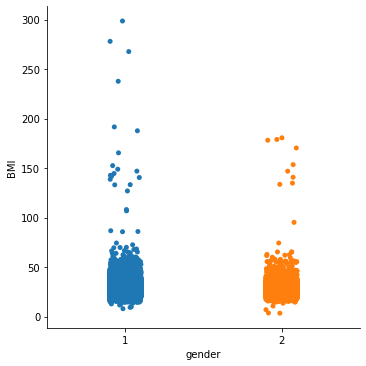

In [41]:
sns.catplot(x='gender',y='BMI',data=df)

### Is median value of Men's BMI is higher then women's BMI?

In [42]:
df.groupby('gender')['BMI'].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

### Consider the output of the following query and answer the questions

In [43]:
df.groupby(['gender','alco','cardio'])['BMI'].median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

## Data Cleaning

In [44]:
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) &
(df['height'] >= df['height'].quantile(0.025)) &
(df['height'] <= df['height'].quantile(0.975)) &
(df['weight'] >= df['weight'].quantile(0.025)) &
(df['weight'] <= df['weight'].quantile(0.975))]

In [45]:
print(filtered_df.shape[0] / df.shape[0])

0.9037


## Visual Data Analytics

### Correlation matrix visualization

<AxesSubplot:>

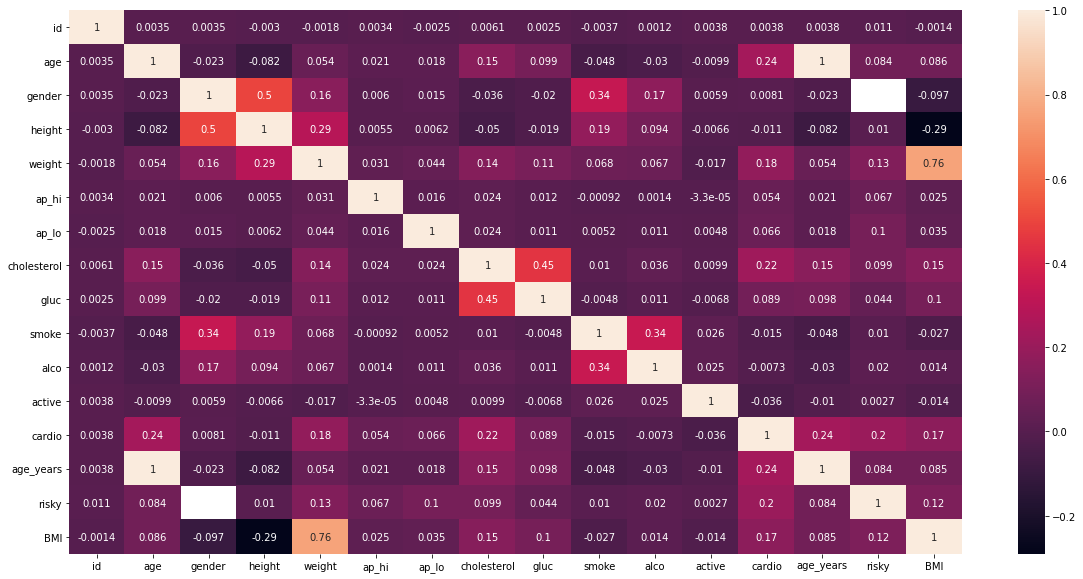

In [46]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True)

## Height and Weight Distribution

### Joint Plot between height and weight columns

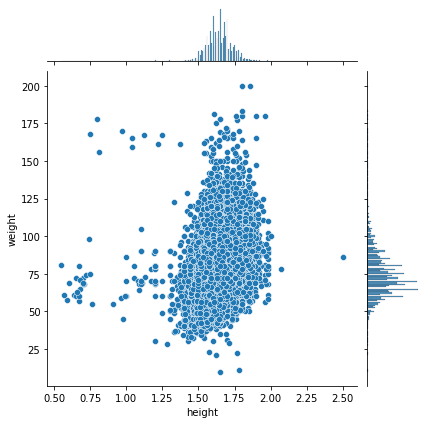

In [47]:
sns.jointplot(x='height',y='weight',data=df)

### Distribution of height and weight for gender

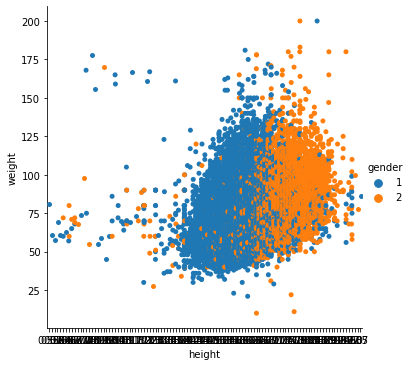

In [48]:
sns.catplot(x='height',y='weight',data=df,hue='gender')

### Find relationship between age_years and Cardio discese. Draw countplot with hue as "cardio"

<AxesSubplot:xlabel='age_years', ylabel='count'>

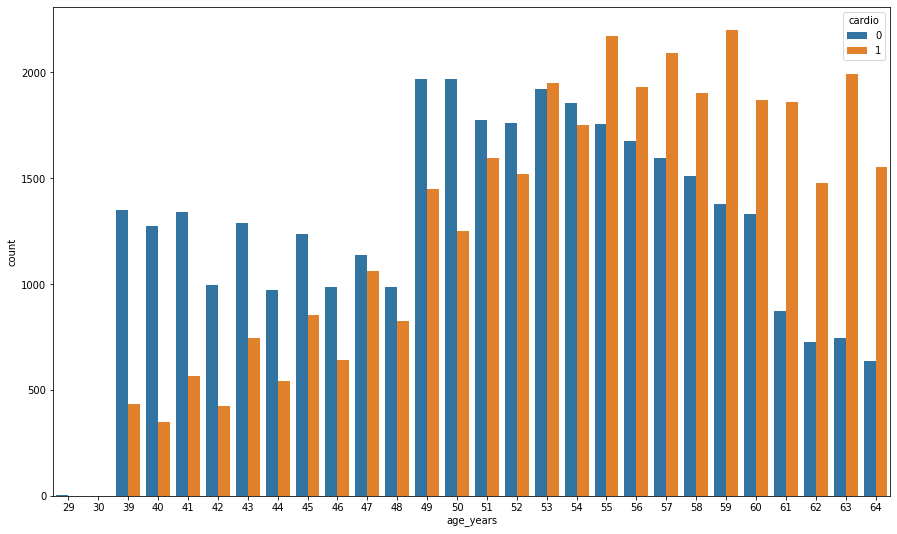

In [49]:
plt.figure(figsize = (15,9))
sns.countplot(x='age_years',hue='cardio',data=df)

## How diastilic and systolic values affect cardio patients?

### Draw Boxen plot

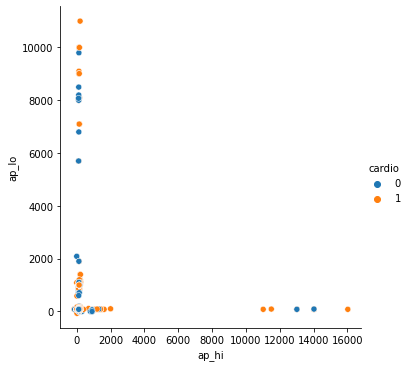

In [50]:
sns.relplot(x='ap_hi',y='ap_lo',hue='cardio',data=df)

#### Now, print max and min values and justify.


In [51]:
df.ap_hi.max()

16020

In [52]:
df.ap_hi.min()

-150

In [53]:
df.ap_lo.max()

11000

In [54]:
df.ap_lo.min()

-70

## How alcohol intake and age affect cardios?

### Draw Violin Plot to represent relationship between alcohol intake and age_years with hue as "cardio"

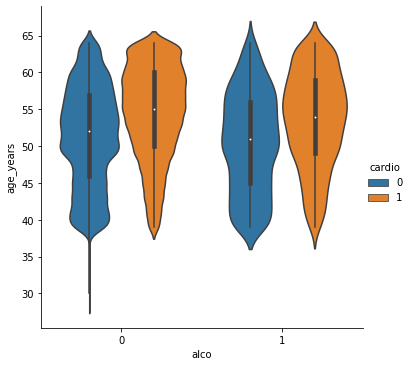

In [55]:
sns.catplot(x='alco',y='age_years',data=df,hue='cardio',kind='violin')

### 1. For Non alcoholic category (ie., alco=0), what is the 50th percentile value for Non-Cardio (ie., cardio=0) people?

In [56]:
gdp=df.groupby(['alco','cardio'])['age_years']

In [57]:
pol=gdp.describe()
pol

count       mean       std   min   25%   50%   75%   max
alco cardio                                                            
0    0       33080.0  51.272642  6.781394  29.0  46.0  52.0  57.0  64.0
     1       33156.0  54.500995  6.343918  39.0  50.0  55.0  60.0  64.0
1    0        1941.0  50.526018  6.777005  39.0  45.0  51.0  56.0  64.0
     1        1823.0  53.561163  6.478578  39.0  49.0  54.0  59.0  64.0

In [58]:
pol.loc[0,0]['50%']

52.0

### 2. For Non alcoholic category (ie., alco=0), what is the 50th percentile value for Cardio (ie., cardio=1) people?

In [59]:
pol.loc[0,1]['50%']

55.0

### 3. For alcoholic category (ie., alco=1), what is the 25th percentile value for Non-Cardio (ie., cardio=0) people?

In [60]:
pol.loc[1,0]['25%']

45.0

### 4. For alcoholic category (ie., alco=1), what is the 25th percentile value for Cardio (ie., cardio=1) people?

In [61]:
pol.loc[1,1]['25%']

49.0